In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
!unzip HW5.zip

--2022-07-12 13:06:26--  https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l5lg0yrs1k7ydmb/HW5.zip [following]
--2022-07-12 13:06:27--  https://www.dropbox.com/s/raw/l5lg0yrs1k7ydmb/HW5.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec833ffde91e651377e1255e85.dl.dropboxusercontent.com/cd/0/inline/Bo6gvj6CYSlAhrL5_jibWmD5N7OeltUKb_NE0a7Vh2VkTs1wrzlUskwYUvrdkeWXND0ThrNh7Ncql3dKFHcdKH5Ayf4V10kGLLyPxo1wEyYEZ0Lb9CkPyArCg3QwbjCQywVJ0IyY2f7ukE4sr90NdmAzDtDNAS3U1hAFy1QfRE-hkA/file# [following]
--2022-07-12 13:06:27--  https://ucec833ffde91e651377e1255e85.dl.dropboxusercontent.com/cd/0/inline/Bo6gvj6CYSlAhrL5_jibWmD5N7OeltUKb_NE0a7Vh2VkTs1wrzlUskwYUvrdkeWXND0ThrNh7Ncql3dKF

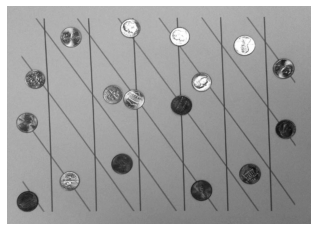

In [3]:
img = cv2.imread('HW5/coins.jpg', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(img, cmap='gray')

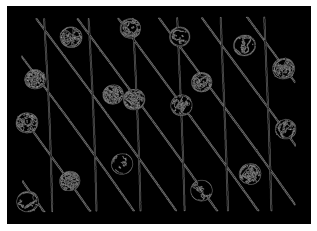

In [4]:
edges = cv2.Canny(img, 50, 150)
plt.axis('off')
plt.imshow(edges, cmap='gray')

In [5]:
def hough_transform(img):

    value_threshold=5
    lines_are_white=True
    angle_step=1

    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step)) #can be changed
    width, height = img.shape
    diag_len = int(np.ceil(np.sqrt(width * width + height * height)))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    
    cos_theta = np.cos(thetas)
    sin_theta = np.sin(thetas)
    num_thetas = len(thetas)

    accumulator = np.zeros((2 * diag_len, num_thetas))
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)

    xcosthetas = np.dot(x_idxs.reshape((-1,1)), cos_theta.reshape((1,-1)))
    ysinthetas = np.dot(y_idxs.reshape((-1,1)), sin_theta.reshape((1,-1)))
    rhosmat = np.round(xcosthetas + ysinthetas) + diag_len
    rhosmat = rhosmat.astype(np.int16)

    for i in range(num_thetas):
        rh,counts = np.unique(rhosmat[:,i], return_counts=True)
        accumulator[rh,i] = counts
    return accumulator, thetas, rhos

In [6]:
accumulator, thetas, rhos = hough_transform(edges)

# Our Result

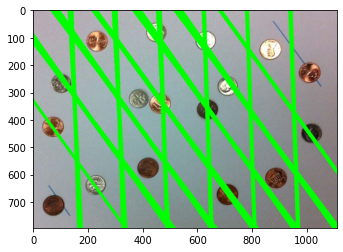

In [7]:
img = cv2.imread('HW5/coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Find lines
lines = []
th = 200
for i in range(accumulator.shape[0]):
    for j in range(accumulator.shape[1]):
        if accumulator[i, j] > th:
            lines.append([rhos[i], thetas[j]])

# Draw lines
for r_theta in lines:
    
    arr = np.array(r_theta, dtype=np.float64)
    r, theta = arr
    
    a = np.cos(theta)
    b = np.sin(theta)
 
    x0 = a*r
    y0 = b*r
 
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))

    img = cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 10)

plt.imshow(img)
plt.show()

# Open CV Result

(795, 1110, 3)


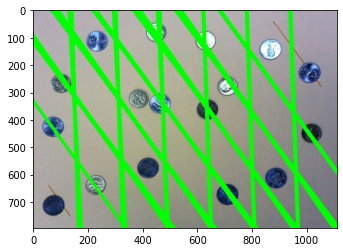

In [8]:
import cv2
import numpy as np

img = cv2.imread('HW5/coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
 

for r_theta in lines:

    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
 
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))
    
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 10)
 
print(img.shape)
plt.imshow(img)